
<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# Regression Analysis: 
A linear Regression is a **linear approximation** of a **causal relationship** between two or more variables

## Multiple Regression

First we need to import the libraries: 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()  #if you want to use seaborn themes with matplotlib functions

### Data Preprocessing

In [20]:
df = pd.read_csv("wage.csv")
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


In [22]:
#Transposing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,0.893048,0.309217,0.0,1.0,1.0,1.0,1.0
black,935.0,0.128342,0.334650,0.0,0.0,0.0,0.0,1.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


In [23]:
df.isna().sum()   
# Alternatively we could use isnull() from pandas. 
# pd.isnull(df).sum() 

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

1. Because the number of NAs in feduc and meduc is greater that 5% of the observations, we should not keep them in the regression

2. For practice purposes, I will keep the meduc in the features. 

In [24]:
df.drop('feduc', axis=1, inplace=True) #why do we need inplace?

In [25]:
# we will replace the missing meduc with median. Because the data is left skewed 
# mean is not a good representation of the central tendency measure.

df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


### Data visualization

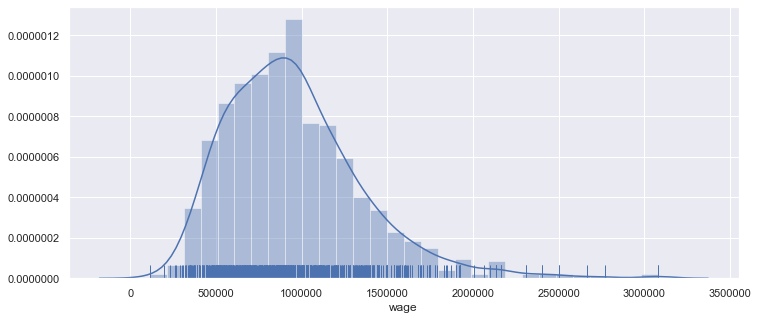

In [26]:
plt.figure(figsize=(12,5))
sns.distplot(df['wage'], bins=30 , rug=True)

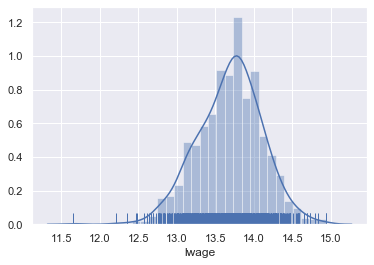

In [34]:
# Need to do log transformation to avoid potential heteroskedasticity
df['lwage']= np.log(df['wage'])
sns.distplot(df['lwage'], bins=30 , rug=True)

In [10]:
df.drop('wage', axis=1, inplace=True)

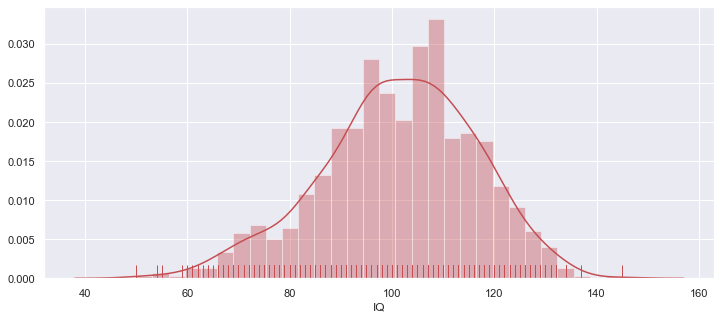

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(df['IQ'], bins=30 ,color='r' , rug=True)

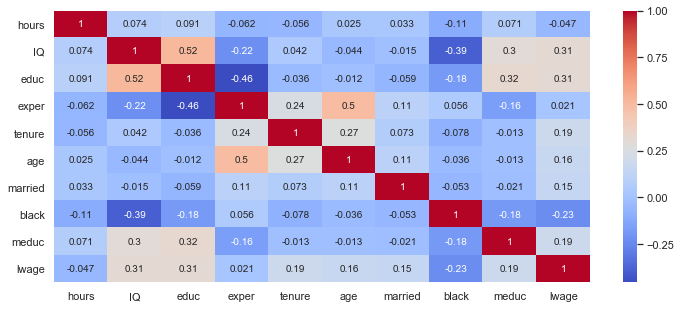

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

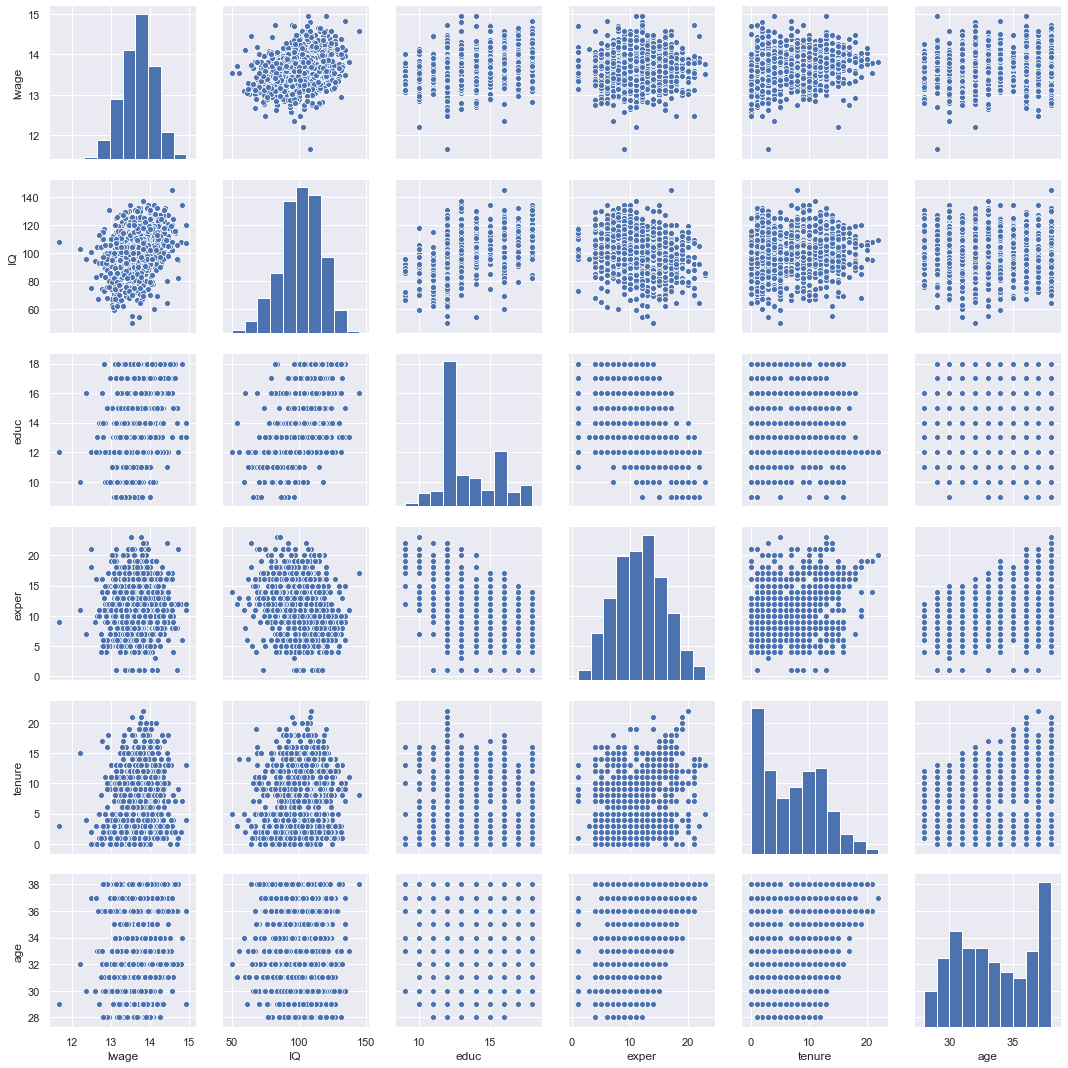

In [13]:
sns.pairplot(df[['lwage', 'IQ', 'educ','exper','tenure','age']])

### Dealing with dummy variables

In [36]:
df2 = df.copy()  # make sure you put df.copy(). Why?
df2['status']=df2['married'].map({1:'Married', 0:'Single'})
df2.drop('married',axis=1 ,inplace=True)
df2.head()

,wage,hours,IQ,educ,exper,tenure,age,black,meduc,lwage,status
0,769000.0,40,93,12,11,2,31,0,8.0,13.552846,Married
1,808000.0,50,119,18,11,16,37,0,14.0,13.602317,Married
2,825000.0,40,108,14,11,9,33,0,14.0,13.623139,Married
3,650000.0,40,96,12,13,7,32,0,12.0,13.384728,Married
4,562000.0,40,74,11,14,5,34,0,6.0,13.239257,Married


In [37]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,wage,hours,IQ,educ,exper,tenure,age,black,meduc,lwage,status_Single
0,769000.0,40,93,12,11,2,31,0,8.0,13.552846,0
1,808000.0,50,119,18,11,16,37,0,14.0,13.602317,0
2,825000.0,40,108,14,11,9,33,0,14.0,13.623139,0
3,650000.0,40,96,12,13,7,32,0,12.0,13.384728,0
4,562000.0,40,74,11,14,5,34,0,6.0,13.239257,0


in this example, since black and married are already dummy variables, we don't need to do any thing else. 

### Defining the variables and splitting the data

In [38]:
y = df['lwage']
X = df.drop('lwage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

len(X_train)/len(X)

0.8

## Linear Regression with StatsModels

Statsmodel is great for learning the theory of regression models. Also Statsmodel works perfectly with pandas dataframe. However, sklearn is a more **practical** package preferred by ML practicitionairs to apply regression analysis.  

In [39]:
# Add a constant
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

C:\Users\mckla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
X_train_wc.head()

,const,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
457,1.0,938000.0,50,130,14,15,1,33,1,0,12.0
807,1.0,666000.0,40,104,12,10,2,29,1,0,12.0
859,1.0,1026000.0,60,105,16,12,1,35,1,0,14.0
174,1.0,951000.0,60,116,12,9,7,30,1,0,12.0
417,1.0,583000.0,58,113,16,9,0,30,1,0,12.0


In [41]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [42]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     919.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:47:13   Log-Likelihood:                 579.78
No. Observations:                 748   AIC:                            -1138.
Df Residuals:                     737   BIC:                            -1087.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7801      0.063    204.117      0.000      12.657      12.903
wage         9.86e-07   1.18e-08     83.246      0.000    9.63e-07    1.01e-06
hours         -0.0022      0.001     -3.909      0.000      -0.003      -0.001
IQ             0.0003      0.000      0.990      0.323      -0.000       0.001
educ          -0.0002      0.003     -0.094      0.925      -0.005       0.005
exper          0.0007      0.001      0.557      0.578      -0.002       0.003
tenure         0.0040      0.001      4.620      0.000       0.002       0.006
age           -0.0008      0.002     -0.485      0.628      -0.004       0.002
married        0.0175      0.014      1.293      0.196      -0.009       0.044
black         -0.0464      0.013     -3.466      0.001      -0.073      -0.020
meduc          0.0013      0.002      0.770      0.442      -0.002       0.004
==============================================================================
Omnibus:                      438.188   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3874.646
Skew:                          -2.549   Prob(JB):                         0.00
Kurtosis:                      12.916   Cond. No.                     1.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Interpreting the results](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate)

In [21]:
# try 
# statsmodels_reg.
statsmodels_reg.conf_int(alpha=0.01) # if you want to be more conservative set alpha=0.01

,0,1
const,11.539143,12.571348
hours,-0.009828,-0.000345
IQ,0.000962,0.006618
educ,0.024192,0.065791
exper,-0.003675,0.017885
tenure,0.001694,0.015917
age,0.000903,0.028227
married,0.051533,0.275097
black,-0.281414,-0.060039
meduc,-0.002603,0.024446


#### Graph of Actual vs. Predicted values

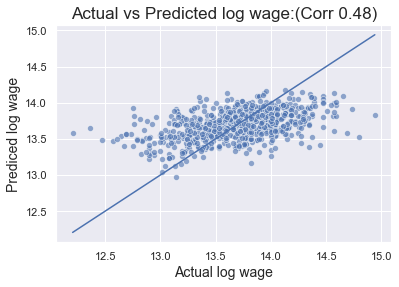

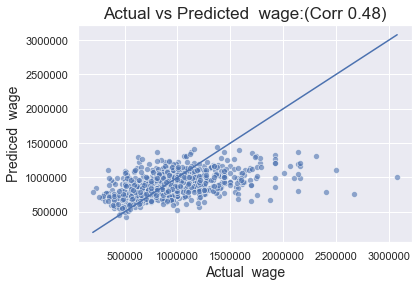

In [24]:
corr = round(y_train.corr(statsmodels_reg.fittedvalues), 2)
sns.scatterplot(x=y_train, y=statsmodels_reg.fittedvalues, alpha=0.6)
sns.lineplot(y_train, y_train)

plt.xlabel('Actual log wage', fontsize=14)
plt.ylabel('Prediced log wage', fontsize=14)
plt.title(f'Actual vs Predicted log wage:(Corr {corr})', fontsize=17)

plt.show()

sns.scatterplot(x=np.e**y_train, y=np.e**statsmodels_reg.fittedvalues,  alpha=0.6)
sns.lineplot(np.e**y_train, np.e**y_train)

plt.xlabel('Actual  wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title(f'Actual vs Predicted  wage:(Corr {corr})', fontsize=17)

plt.show()



#### Residuals vs Predicted values

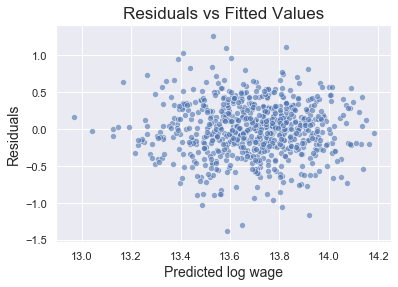

In [25]:
sns.scatterplot(x=statsmodels_reg.fittedvalues, y=statsmodels_reg.resid , alpha=0.6)

plt.xlabel('Predicted log wage', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()


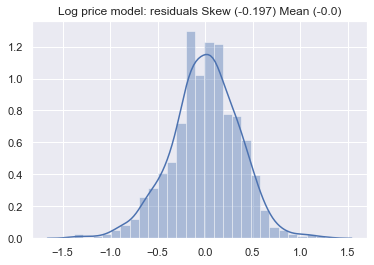

In [26]:
resid_mean = round(statsmodels_reg.resid.mean(), 3)
resid_skew = round(statsmodels_reg.resid.skew(), 3)

sns.distplot(statsmodels_reg.resid)
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [27]:
# Mean Squared Error 
MSE = round(statsmodels_reg.mse_resid, 3)
MSE

0.131

## Linear Regression with Scikit-Learn

So far we have only worked with data frames using Pandas. Now we may need to transform our data into arrays by using numpy because sklearn uses arrays instead of data frames. 

**Scikit-learn** is a very powerful package enabling you to do almost everything in machine learning including Regression, Classification, Clustering, SVM and Dimensionality reduction. However, I don't recommend sklearn for deep learning algorithms. Pytorch, Tensorflow and Keras are better alternatives for deep learning. 

#### Note: with sklearn, we don't need to add constants mannually. 

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
sklearn_reg = LinearRegression()

In [30]:
sklearn_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  Generating results

try reg.

In [31]:
# The coefficients of the regression
sklearn_reg.coef_

array([-0.00508645,  0.00379004,  0.04499157,  0.00710532,  0.00880574,
        0.01456483,  0.16331493, -0.17072619,  0.01092151])

In [32]:
# The intercept of the regression
sklearn_reg.intercept_

12.055245334454883

In [33]:
# The R-squared of the regression
sklearn_reg.score(X_train,y_train)

0.2278261765190378

In [34]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
457,50,130,14,15,1,33,1,0,12.0
807,40,104,12,10,2,29,1,0,12.0
859,60,105,16,12,1,35,1,0,14.0
174,60,116,12,9,7,30,1,0,12.0
417,58,113,16,9,0,30,1,0,12.0


In [35]:
# If we want to find the Adjusted R-squared we can do so by knowing the R2, the # observations, the # features
R2 = sklearn_reg.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_R2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_R2

0.21840942257414797

In [36]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = X_train.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = sklearn_reg.coef_
reg_summary

,Features,Coefficients
0,hours,-0.005086
1,IQ,0.003790
2,educ,0.044992
3,exper,0.007105
4,tenure,0.008806
5,age,0.014565
6,married,0.163315
7,black,-0.170726
8,meduc,0.010922


### [Further Diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

#### Multicollinearity

sklearn does not have a built-in way to check for multicollinearity. The main reasons is that this is an issue well covered in statistical frameworks and not in ML ones. However, we can use statsmodels to run the VIF test.

In [37]:
X_train.columns.values

array(['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'], dtype=object)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
collinearity = X_train[['hours','IQ','educ','exper','tenure','age', 'married', 'black', 'meduc']]
VIF = pd.DataFrame()

In [40]:
VIF["Features"] = collinearity.columns
VIF["VIF"] = [variance_inflation_factor(collinearity.values, i) for i in range(collinearity.shape[1])]

VIF

,Features,VIF
0,hours,33.859663
1,IQ,60.857443
2,educ,68.139961
3,exper,15.038459
4,tenure,3.456928
5,age,116.108410
6,married,9.420645
7,black,1.273572
8,meduc,19.384284


#### heteroskedasticity

In [41]:
# using the White test for example: 
from statsmodels.stats.diagnostic import het_white

In [42]:
hetero = X_train_wc
F_stat_pvalue = het_white(statsmodels_reg.resid.values, hetero.values, retres=False)[3]
F_stat_pvalue

0.0014769435236610107

###  Testing

Once we have trained and fine-tuned our model, we can proceed to testing it. Testing is done on a dataset that the algorithm has never seen

In [43]:
# Using our statmodels results.
statsmodels_reg.predict(X_test_wc).head(4)

143    13.725665
229    13.753259
116    13.664840
134    13.565368
dtype: float64

In [44]:
# Using our sklearn reg.
sklearn_reg.predict(X_test)[0:4]

array([13.72566539, 13.75325897, 13.66484037, 13.56536839])

In [45]:
y_hat_test = sklearn_reg.predict(X_test)
log_predictions = pd.DataFrame( {'Actuals':y_test , 'Predictions': y_hat_test})
predictions = np.exp(log_predictions)
predictions.tail()

# You can reset the index if you wish. How? 

,Actuals,Predictions
471,511000.0,7.827895e+05
191,840000.0,1.093139e+06
688,865000.0,8.161840e+05
10,930000.0,1.435088e+06
420,1850000.0,8.345331e+05


In [46]:
# Additionally, we can calculate the difference and percentage difference between the targets and the predictions
predictions['Residuals'] = predictions['Predictions'] - predictions['Actuals']
predictions['Difference%'] = np.absolute(predictions['Residuals']/predictions['Actuals']*100)
predictions.round().tail(5)


,Actuals,Predictions,Residuals,Difference%
471,511000.0,782789.0,271789.0,53.0
191,840000.0,1093139.0,253139.0,30.0
688,865000.0,816184.0,-48816.0,6.0
10,930000.0,1435088.0,505088.0,54.0
420,1850000.0,834533.0,-1015467.0,55.0


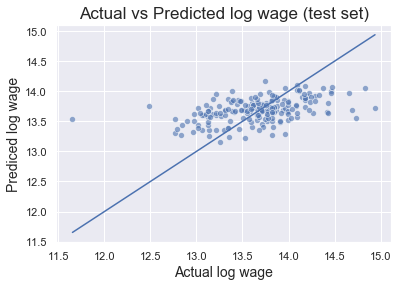

In [47]:
sns.scatterplot(x=y_test, y=y_hat_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual log wage', fontsize=14)
plt.ylabel('Prediced log wage', fontsize=14)
plt.title('Actual vs Predicted log wage (test set)', fontsize=17)
plt.show()

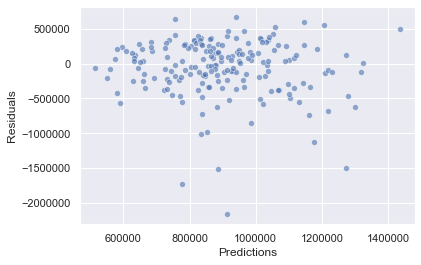

In [48]:
sns.scatterplot(x=predictions['Predictions'], y=predictions['Residuals'] , alpha=0.6)
plt.show()

# try to replicate this residual plot using log wages



# Plotting the Simple Regression Line 

Let's pick one of the most significant features and make a simple regression model with that. 

In [49]:
df.head(4)

,hours,IQ,educ,exper,tenure,age,married,black,meduc,lwage
0,40,93,12,11,2,31,1,0,8.0,13.552846
1,50,119,18,11,16,37,1,0,14.0,13.602317
2,40,108,14,11,9,33,1,0,14.0,13.623139
3,40,96,12,13,7,32,1,0,12.0,13.384728


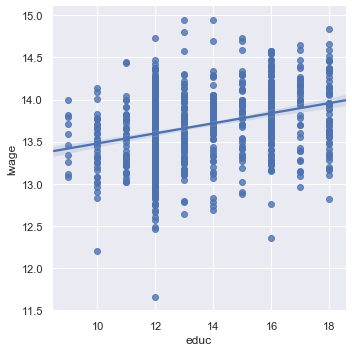

In [50]:
sns.lmplot(x='educ',y='lwage',data=df)
plt.show()

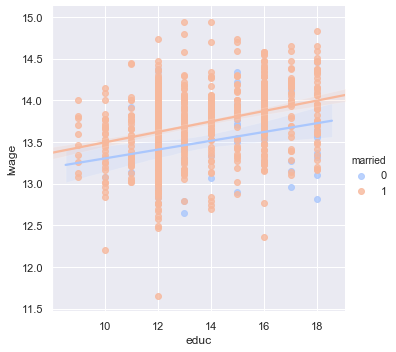

In [51]:
sns.lmplot(x='educ',y='lwage',data=df, hue='married',palette='coolwarm') # how do you interpret this one?
plt.show()

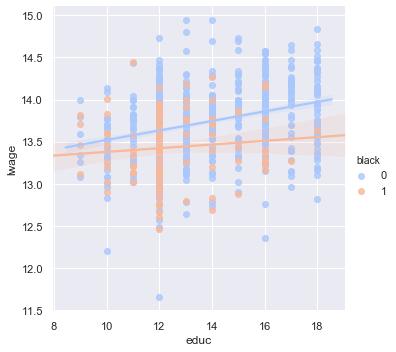

In [52]:
sns.lmplot(x='educ',y='lwage',data=df, hue='black',palette='coolwarm')  # how do you interpret this one?
plt.show()

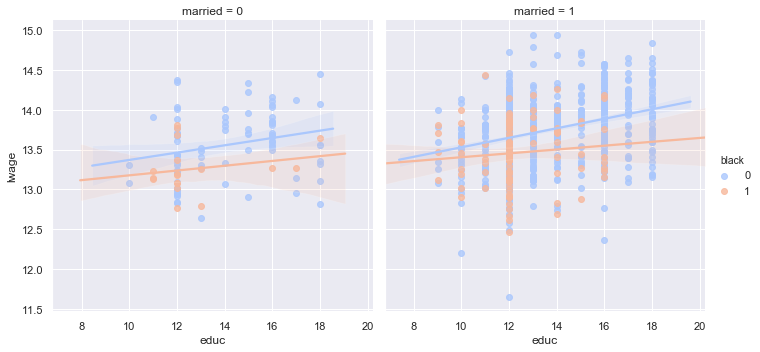

In [53]:
sns.lmplot(x='educ',y='lwage',data=df, hue='black',palette='coolwarm', col='married')  # how do you interpret this one?
plt.show()